# Matthew Juhls
## 11/16/25
## Web Scraping Project and Analysis
## Purpose: Scrape Nascar Cup Series data and create some useful visualizations and analysis

In [70]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Q1: Is there a correlation between starting first and finishing in the top 5?

In [71]:
url = "https://speedwaycollective.com/drivers/driver?driver_id=28&season_id=2022&series_id=1"
response = requests.get(url)
status = response.status_code

if status == 200:
    page = response.text
    soup = bs(page, "html.parser")

    table = soup.find("table")

    rows = table.find_all("tr")

    headers = []
    for h in rows[0].find_all("th"):
        headers.append(h.get_text().strip())

    data = []
    for r in rows[1:]:
        cells = r.find_all("td")
        if cells:
            row = []
            for c in cells:
                row.append(c.get_text().strip())
            data.append(row)

    df = pd.DataFrame(data, columns=headers)

    df["Start"] = pd.to_numeric(df["Start"], errors="coerce")
    df["Finish"] = pd.to_numeric(df["Finish"], errors="coerce")

    df["start_first"] = (df["Start"] == 1).astype(int)
    df["finish_top5"] = (df["Finish"] <= 5).astype(int)

    print(df[["start_first","finish_top5"]].corr())

else:
    print("Oops, status code:", status)

             start_first  finish_top5
start_first     1.000000     0.341121
finish_top5     0.341121     1.000000


#### Weak correlation, 0.34 when starting from first place

### Q2: What is the percentage of wins vs non wins for Joey Logano in the 2022 season?

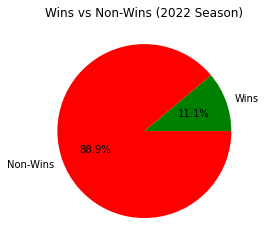

In [72]:
url = "https://speedwaycollective.com/drivers/driver?driver_id=28&season_id=2022&series_id=1"
response = requests.get(url)
status = response.status_code

if status == 200:
    page = response.text
    soup = bs(page, "html.parser")

    table = soup.find("table")
    rows = table.find_all("tr")

    headers = []
    for h in rows[0].find_all("th"):
        headers.append(h.get_text().strip())

    data = []
    for r in rows[1:]:
        cells = r.find_all("td")
        if cells:
            row = []
            for c in cells:
                row.append(c.get_text().strip())
            data.append(row)

    df = pd.DataFrame(data, columns=headers)

    df["Finish"] = pd.to_numeric(df["Finish"], errors="coerce")

    wins = (df["Finish"] == 1).sum()
    non_wins = len(df) - wins

    labels = ["Wins", "Non-Wins"]
    sizes = [wins, non_wins]
    colors = ["green", "red"]

    plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
    plt.title("Wins vs Non-Wins (2022 Season)")
    plt.show()

else:
    print("Oops, status code:", status)

#### Win percentage: 11.1%, non wins 88.9%

### Q3: Who are all the drivers with at least 1 win in the 2025 season?

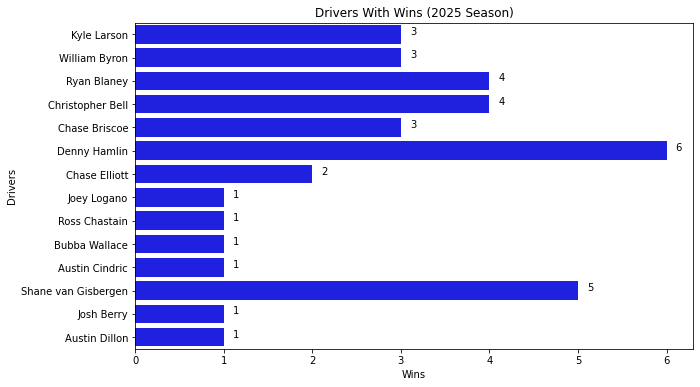

In [73]:
url = "https://speedwaycollective.com/drivers/stats"
response = requests.get(url)

if response.status_code == 200:
    page = response.text
    soup = bs(page, "html.parser")

    table = soup.find("table")
    rows = table.find_all("tr")

    headers = []
    first_row = rows[0].find_all("th")
    for h in first_row:
        headers.append(h.get_text().strip())

    data = []
    for r in rows[1:]:
        cells = r.find_all("td")
        if cells:
            row_list = []
            for c in cells:
                row_list.append(c.get_text().strip())
            data.append(row_list)

    df = pd.DataFrame(data, columns=headers)

    df["Wins"] = pd.to_numeric(df["Wins"], errors="coerce")

    df = df[df["Wins"] > 0]

    plt.figure(figsize=(10,6))
    sns.barplot(x=df["Wins"], y=df["Driver"], color="blue")

    index = 0
    for value in df["Wins"]:
        plt.text(value + 0.1, index, str(value))
        index = index + 1

    plt.title("Drivers With Wins (2025 Season)")
    plt.xlabel("Wins")
    plt.ylabel("Drivers")
    plt.show()

else:
    print("Error:", response.status_code)

#### Bar graph of at least 1 win, lots of one time winners but Denny Hamlin was the best for this graph.

### Q4: What do the 2025 season standings look like based on laps led? Should Nascar Switch to this ranking?

In [74]:
url = "https://speedwaycollective.com/drivers/stats"
response = requests.get(url)
status = response.status_code

if status == 200:
    page = response.text
    soup = bs(page, "html.parser")

    table = soup.find("table")
    rows = table.find_all("tr")

    headers = []
    for h in rows[0].find_all("th"):
        headers.append(h.get_text().strip())

    data = []
    for r in rows[1:]:
        cells = r.find_all("td")
        if cells:
            row = []
            for c in cells:
                row.append(c.get_text().strip())
            data.append(row)

    df = pd.DataFrame(data, columns=headers)

    df["Laps Led"] = pd.to_numeric(df["Laps Led"], errors="coerce")

    df_sorted = df.sort_values("Laps Led", ascending=False)

    print(df_sorted[["Driver", "Laps Led"]].to_string(index=False))

else:
    print("Oops, status code:", status)

              Driver  Laps Led
       William Byron      1330
         Kyle Larson      1106
        Denny Hamlin      1024
       Chase Briscoe       884
         Ryan Blaney       852
         Joey Logano       577
       Chase Elliott       453
       Bubba Wallace       378
      Austin Cindric       325
 Shane van Gisbergen       312
            Ty Gibbs       304
    Christopher Bell       282
     Brad Keselowski       221
          Josh Berry       207
       Tyler Reddick       169
         Alex Bowman       165
         Ryan Preece       133
      Carson Hocevar       122
       Austin Dillon       119
    Michael McDowell        96
          Kyle Busch        88
       Ross Chastain        83
      Chris Buescher        47
  A.J.  Allmendinger        42
John Hunter Nemechek        37
       Daniel Suárez        35
           Cody Ware        32
      Todd Gilliland        23
          Zane Smith        22
     Anthony Alfredo        21
        Justin Haley        20
        

#### Same front runners, couple names further down then usual, like Christopher Bell and Ross Chastain, who both were winners this season

## Analysis

#### For my first question, I wanted to know if there was a correlation between starting the race in first position and finishing in the top 5. The results for this program gave me a correlation matrix showing 1.0 for starting first and 0.34 for finishing top 5. So what does this mean? The matrix shows a weak correlation between the 2 variables, meaning its not as likely that when the driver is starting in first, it doesnt always mean that he will finish in the top 5, for whatever circumstances, like mechanical failures or racing incidents. 

#### For my second question, I wanted to see a pie chart for favorite driver's win to non win races in the 2022 season. He had a great season and won the championship, so I thought it'd be fitting to see his win pertentage. In that season he had won 4/36 of the races ran, which came out to 11.1% for wins and 89.9% for the non wins. That score isn't bad at all since there are around 40 drivers who compete in a season and are all at the top of the series, so the competition is very tough.

#### For my third question, I wanted to create a bar graph that shows all the drivers in the 2025 season and the amount of wins they had. I only included the winners as there were 60 total drivers who competed, so that includes full time, part time, and one offs, so for the sake of neatness it would be best to include those with wins only. The 2025 season saw 14 different winners, 6 had 1 win only and the 8 other drivers had over 1 win. There are a lot of ties for the least amount of wins at 1 win, but the best driver simply going off of wins would be Denny Hamlin since he came out of the season with 6 total wins. Very impressive.

#### My final question was a 2-part one; what would the season standings look like if they were based on the number of laps led vs the usual points system and should seasons use this method? I was a little surprised with the results as a couple of the usual front runners for this year with wins were further down then they were in the regular points system, but near the top it was all the usual drivers having the most laps led. Based on the laps led system alone, it would make some sense to switch from ranking based on points earned to total laps led, however, when you take into account the lap count for some of the races, it begins to make less and less sense. Some tracks are very long, over 2 miles long, and have lap counts under 200, while the very short tracks can have upwards of 500. One driver can win 2 races that are held on super long tracks while one driver can dominate and win a race with 500 laps and still come out ahead, so thats the real downside to the system.

## Citations:

#### For the beginnings of the programs, I used the slideshow with provided code such, specifically for the 'url, response, status' and the ends for the 'else' portion. For inside the programs, I found the soup.find command useful from the powerpoint, but for the the program heavy sections I used chatgpt, like for the for loops or the condtions that it needed to check for some of these questions I had since I didn't know how to do them, so this is especially true for questions 1 and 4. For the charts, I knew most of the starters, like the titles or the labels, its just a matter of getting the data into those that I don't fully know the ins and outs of yet, and for the pie chart I wanted to make the values a percentage so I wanted to look that up.